##  关联 （Correlation）

###   边缘箱形图 （Marginal Boxplot）
边缘箱图与边缘直方图具有相似的用途。 然而，箱线图有助于精确定位 X 和 Y 的中位数、第25和第75百分位数。

### 导入所需要的库

In [2]:
import numpy as np              # 导入numpy库
import pandas as pd             # 导入pandas库
import matplotlib as mpl        # 导入matplotlib库
import matplotlib.pyplot as plt
import seaborn as sns           # 导入seaborn库

### 设定图像各种属性

In [3]:
large = 22; med = 16; small = 12
            
params = {'axes.titlesize': large,    # 设置子图上的标题字体
            'legend.fontsize': med,     # 设置图例的字体
            'figure.figsize': (16, 10), # 设置图像的画布
           'axes.labelsize': med,      # 设置标签的字体
            'xtick.labelsize': med,     # 设置x轴上的标尺的字体
            'ytick.labelsize': med,     # 设置整个画布的标题字体
          'figure.titlesize': large}  
plt.rcParams.update(params)           # 更新默认属性
plt.style.use('seaborn-whitegrid')    # 设定整体风格
sns.set_style("white")                # 设定整体背景风格

### 测试版本

In [4]:
print(mpl.__version__)
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

3.1.0
0.9.0
0.24.2
1.16.4


### 程序代码

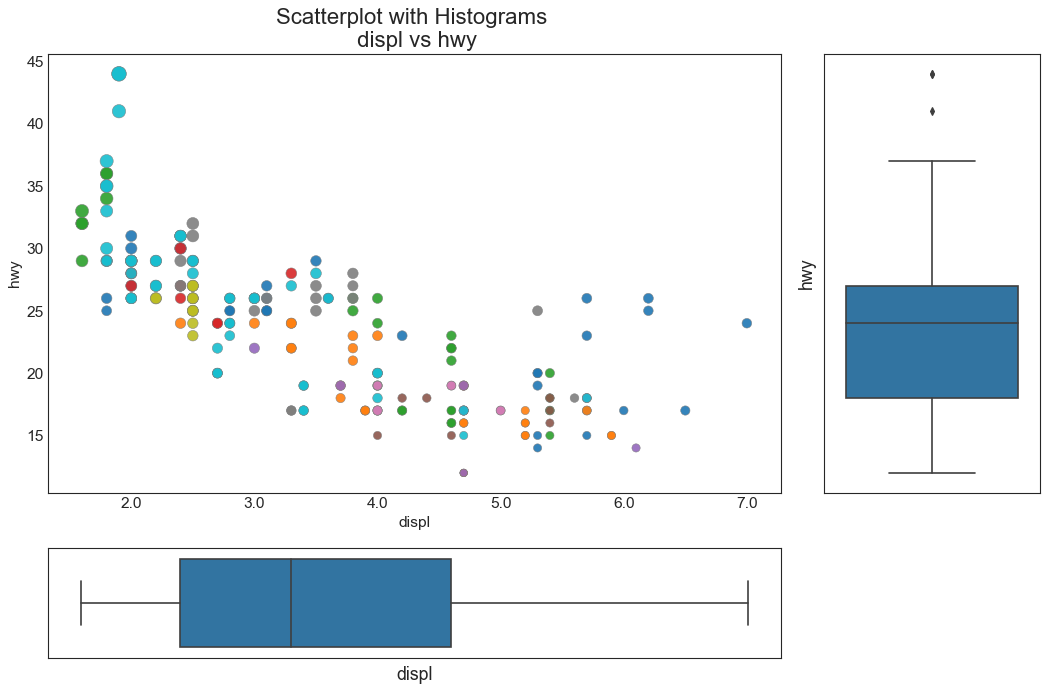

In [5]:
# step1：导入数据
df = df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# step2:创建子图对象与网格
    # 画布
fig = plt.figure(figsize = (16, 10),    # 画布大小_(16, 10)
           dpi = 80)              # 分辨率_80 
    # 网格
grid = plt.GridSpec(4,                   # 行数
             4,                   # 列数
            hspace = 0.5,         # 行与行之间的间隔
            wspace = 0.2)         # 列与列之间的间隔

# step3：明确子图的位置
    # 确定如图所示散点图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
    # 确定如图所示右边边缘箱形图的位置
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
    # 确定如图所示最底下边缘箱形图的位置
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels = [], yticklabels = [])

# step4:散点图 
ax_main.scatter('displ',                # 横坐标
               'hwy',                   # 纵坐标
               s= df.cty * 5,           # 设置点的尺寸
               c = df.manufacturer.astype('category').cat.codes,   # 颜色类别
               alpha = 0.9,             # 透明度
               data = df,               # 所使用的数据
               cmap = 'tab10',           # 调色板 
               edgecolors = 'gray',    # 边框颜色
               linewidths = 0.5)        # 线宽

# step5：右边的箱线图
sns.boxplot(df.hwy,         # 需要绘制的变量    
           ax = ax_right,   # 绘制需要的子图
           orient= 'v')     # 方位__垂直

# step6：底部的箱线图
sns.boxplot(df.displ,       # 需要绘制的变量
           ax = ax_bottom,  # 绘制需要的子图
           orient = 'h')    # 方位__水平

# step7：装饰图像
ax_main.set(title = 'Scatterplot with Histograms \n displ vs hwy',   # 设置标题
           xlabel = 'displ',            # 横坐标名称
           ylabel = 'hwy')              # 纵坐标名称
ax_main.title.set_fontsize(20)              # 设置标题字体大小

    # xaxis.label__x坐标轴的标题
    # yaxis.label__y坐标轴的标题
    # xticklabel__x坐标轴的标尺
    # yticklabel__y坐标轴的标尺
        # 遍历每一个对象并且修改其字体大小
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)               # 修改字体大小

xlabels = ax_main.get_xticks().tolist() # 将散点图上的x坐标轴上的标尺提取后转换为list(一位小数)
ax_main.set_xticklabels(xlabels)        # 将xlabels中的数字设置为散点图上的坐标轴上的标尺
plt.show()  